In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Having a look on data set

In [2]:
df=pd.read_csv('day.csv')
df


instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        1           1   
1          2  02-01-2018       1   0     1        0        2           1   
2          3  03-01-2018       1   0     1        0        3           1   
3          4  04-01-2018       1   0     1        0        4           1   
4          5  05-01-2018       1   0     1        0        5           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        5           1   
726      727  28-12-2019       1   1    12        0        6           0   
727      728  29-12-2019       1   1    12        0        0           0   
728      729  30-12-2019       1   1    12        0        1           1   
729      730  31-12-2019       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
0             2  14.110847  18.18125  80.5833  10.749882     331         654   
1             2  14.902598  17.68695  69.6087  16.652113     131         670   
2             1   8.050924   9.47025  43.7273  16.636703     120        1229   
3             1   8.200000  10.60610  59.0435  10.739832     108        1454   
4             1   9.305237  11.46350  43.6957  12.522300      82        1518   
..          ...        ...       ...      ...        ...     ...         ...   
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729  

[730 rows x 16 columns]

In [3]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [4]:
df.shape

(730, 16)

# EDA for the data set

In [5]:
# lets check first for some null values
df.isnull()

instant  dteday  season     yr   mnth  holiday  weekday  workingday  \
0      False   False   False  False  False    False    False       False   
1      False   False   False  False  False    False    False       False   
2      False   False   False  False  False    False    False       False   
3      False   False   False  False  False    False    False       False   
4      False   False   False  False  False    False    False       False   
..       ...     ...     ...    ...    ...      ...      ...         ...   
725    False   False   False  False  False    False    False       False   
726    False   False   False  False  False    False    False       False   
727    False   False   False  False  False    False    False       False   
728    False   False   False  False  False    False    False       False   
729    False   False   False  False  False    False    False       False   

     weathersit   temp  atemp    hum  windspeed  casual  registered    cnt  
0         False  False  False  False      False   False       False  False  
1         False  False  False  False      False   False       False  False  
2         False  False  False  False      False   False       False  False  
3         False  False  False  False      False   False       False  False  
4         False  False  False  False      False   False       False  False  
..          ...    ...    ...    ...        ...     ...         ...    ...  
725       False  False  False  False      False   False       False  False  
726       False  False  False  False      False   False       False  False  
727       False  False  False  False      False   False       False  False  
728       False  False  False  False      False   False       False  False  
729       False  False  False  False      False   False       False  False  

[730 rows x 16 columns]

In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- So, here no null values can be found so we can have our EDA started for data set 

In [7]:
# Lets see and convert some categorical variables into numerical variables
df['mnth']=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})

In [8]:
df

instant      dteday  season  yr mnth  holiday weekday  workingday  \
0          1  01-01-2018  spring   0  Jan        0     Mon           1   
1          2  02-01-2018  spring   0  Jan        0     Tue           1   
2          3  03-01-2018  spring   0  Jan        0     Wed           1   
3          4  04-01-2018  spring   0  Jan        0     Thu           1   
4          5  05-01-2018  spring   0  Jan        0     Fri           1   
..       ...         ...     ...  ..  ...      ...     ...         ...   
725      726  27-12-2019  spring   1  Dec        0     Fri           1   
726      727  28-12-2019  spring   1  Dec        0     Sat           0   
727      728  29-12-2019  spring   1  Dec        0     Sun           0   
728      729  30-12-2019  spring   1  Dec        0     Mon           1   
729      730  31-12-2019  spring   1  Dec        0     Tue           1   

        weathersit       temp     atemp      hum  windspeed  casual  \
0    Mist + Cloudy  14.110847  18.18125  80.5833  10.749882     331   
1    Mist + Cloudy  14.902598  17.68695  69.6087  16.652113     131   
2            Clear   8.050924   9.47025  43.7273  16.636703     120   
3            Clear   8.200000  10.60610  59.0435  10.739832     108   
4            Clear   9.305237  11.46350  43.6957  12.522300      82   
..             ...        ...       ...      ...        ...     ...   
725  Mist + Cloudy  10.420847  11.33210  65.2917  23.458911     247   
726  Mist + Cloudy  10.386653  12.75230  59.0000  10.416557     644   
727  Mist + Cloudy  10.386653  12.12000  75.2917   8.333661     159   
728          Clear  10.489153  11.58500  48.3333  23.500518     364   
729  Mist + Cloudy   8.849153  11.17435  57.7500  10.374682     439   

     registered   cnt  
0           654   985  
1           670   801  
2          1229  1349  
3          1454  1562  
4          1518  1600  
..          ...   ...  
725        1867  2114  
726        2451  3095  
727        1182  1341  
728        1432  1796  
729        2290  2729  

[730 rows x 16 columns]

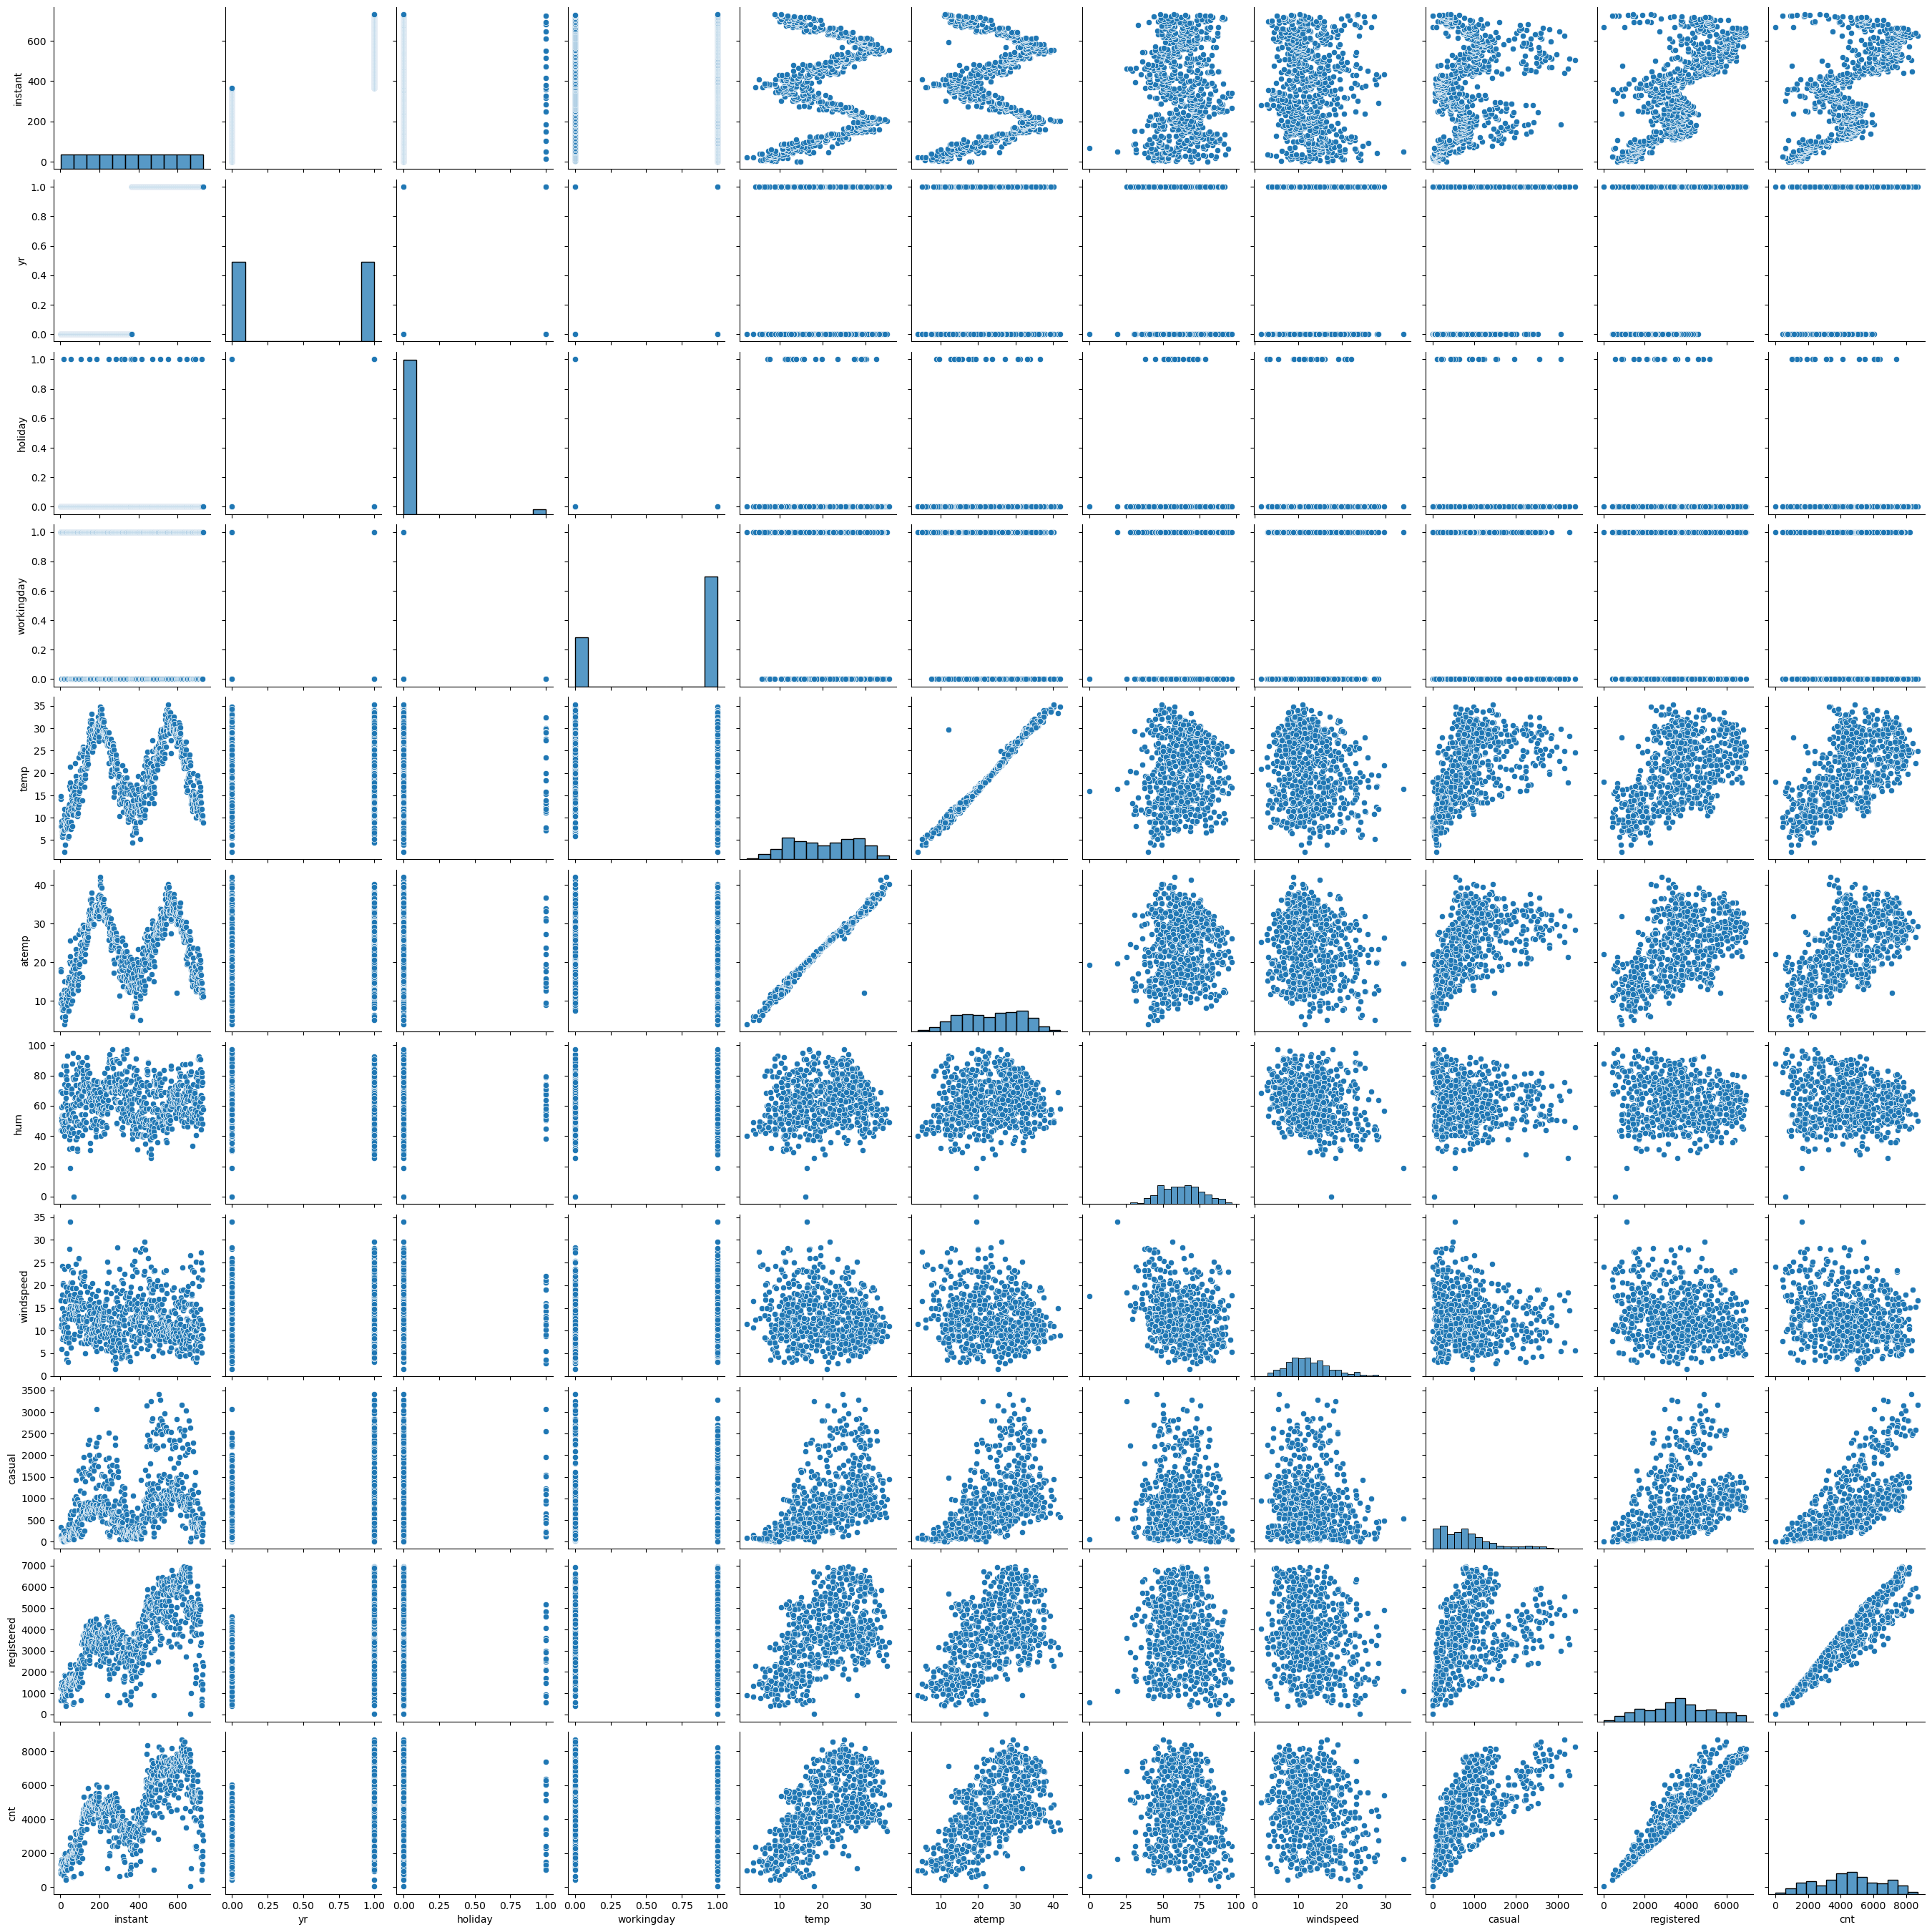

In [9]:
# lets combine all attributes and check
sns.pairplot(df)
plt.show()

- Here we can see some variables are having some visiable good co-relation

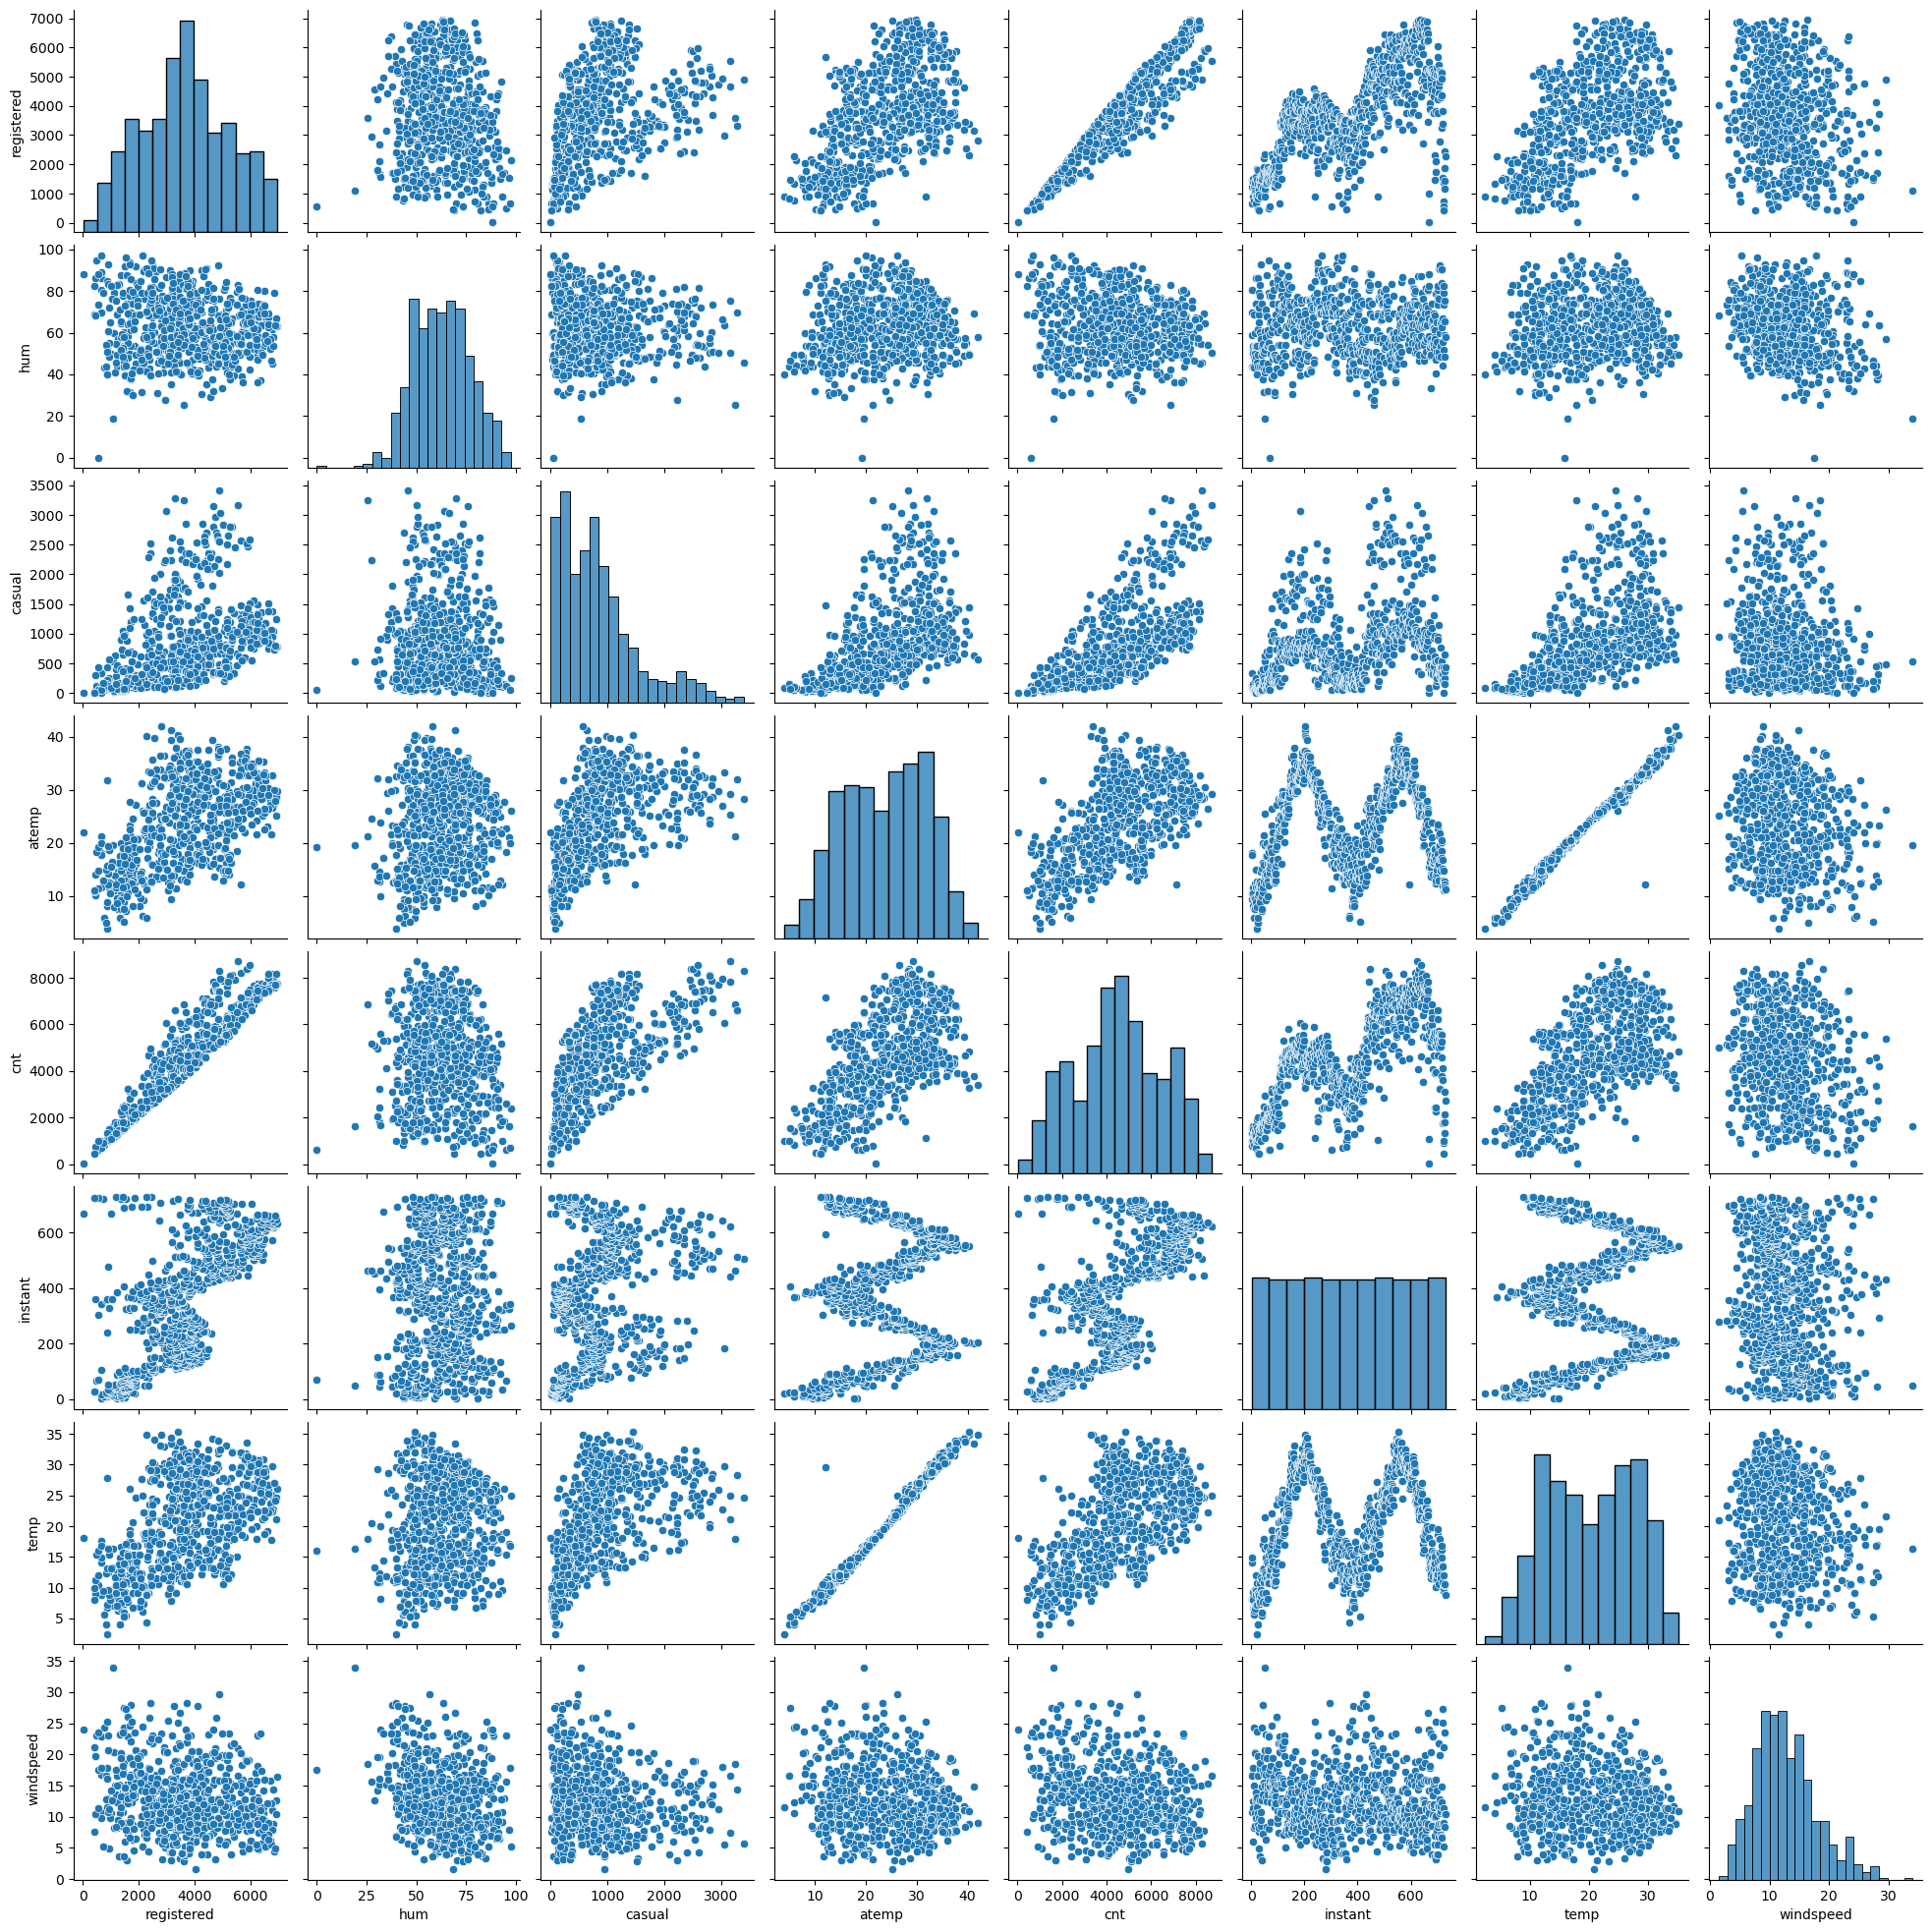

In [10]:
sns.pairplot(df, vars=['registered', 'hum','casual','atemp','cnt','instant','temp','windspeed'])
plt.show()

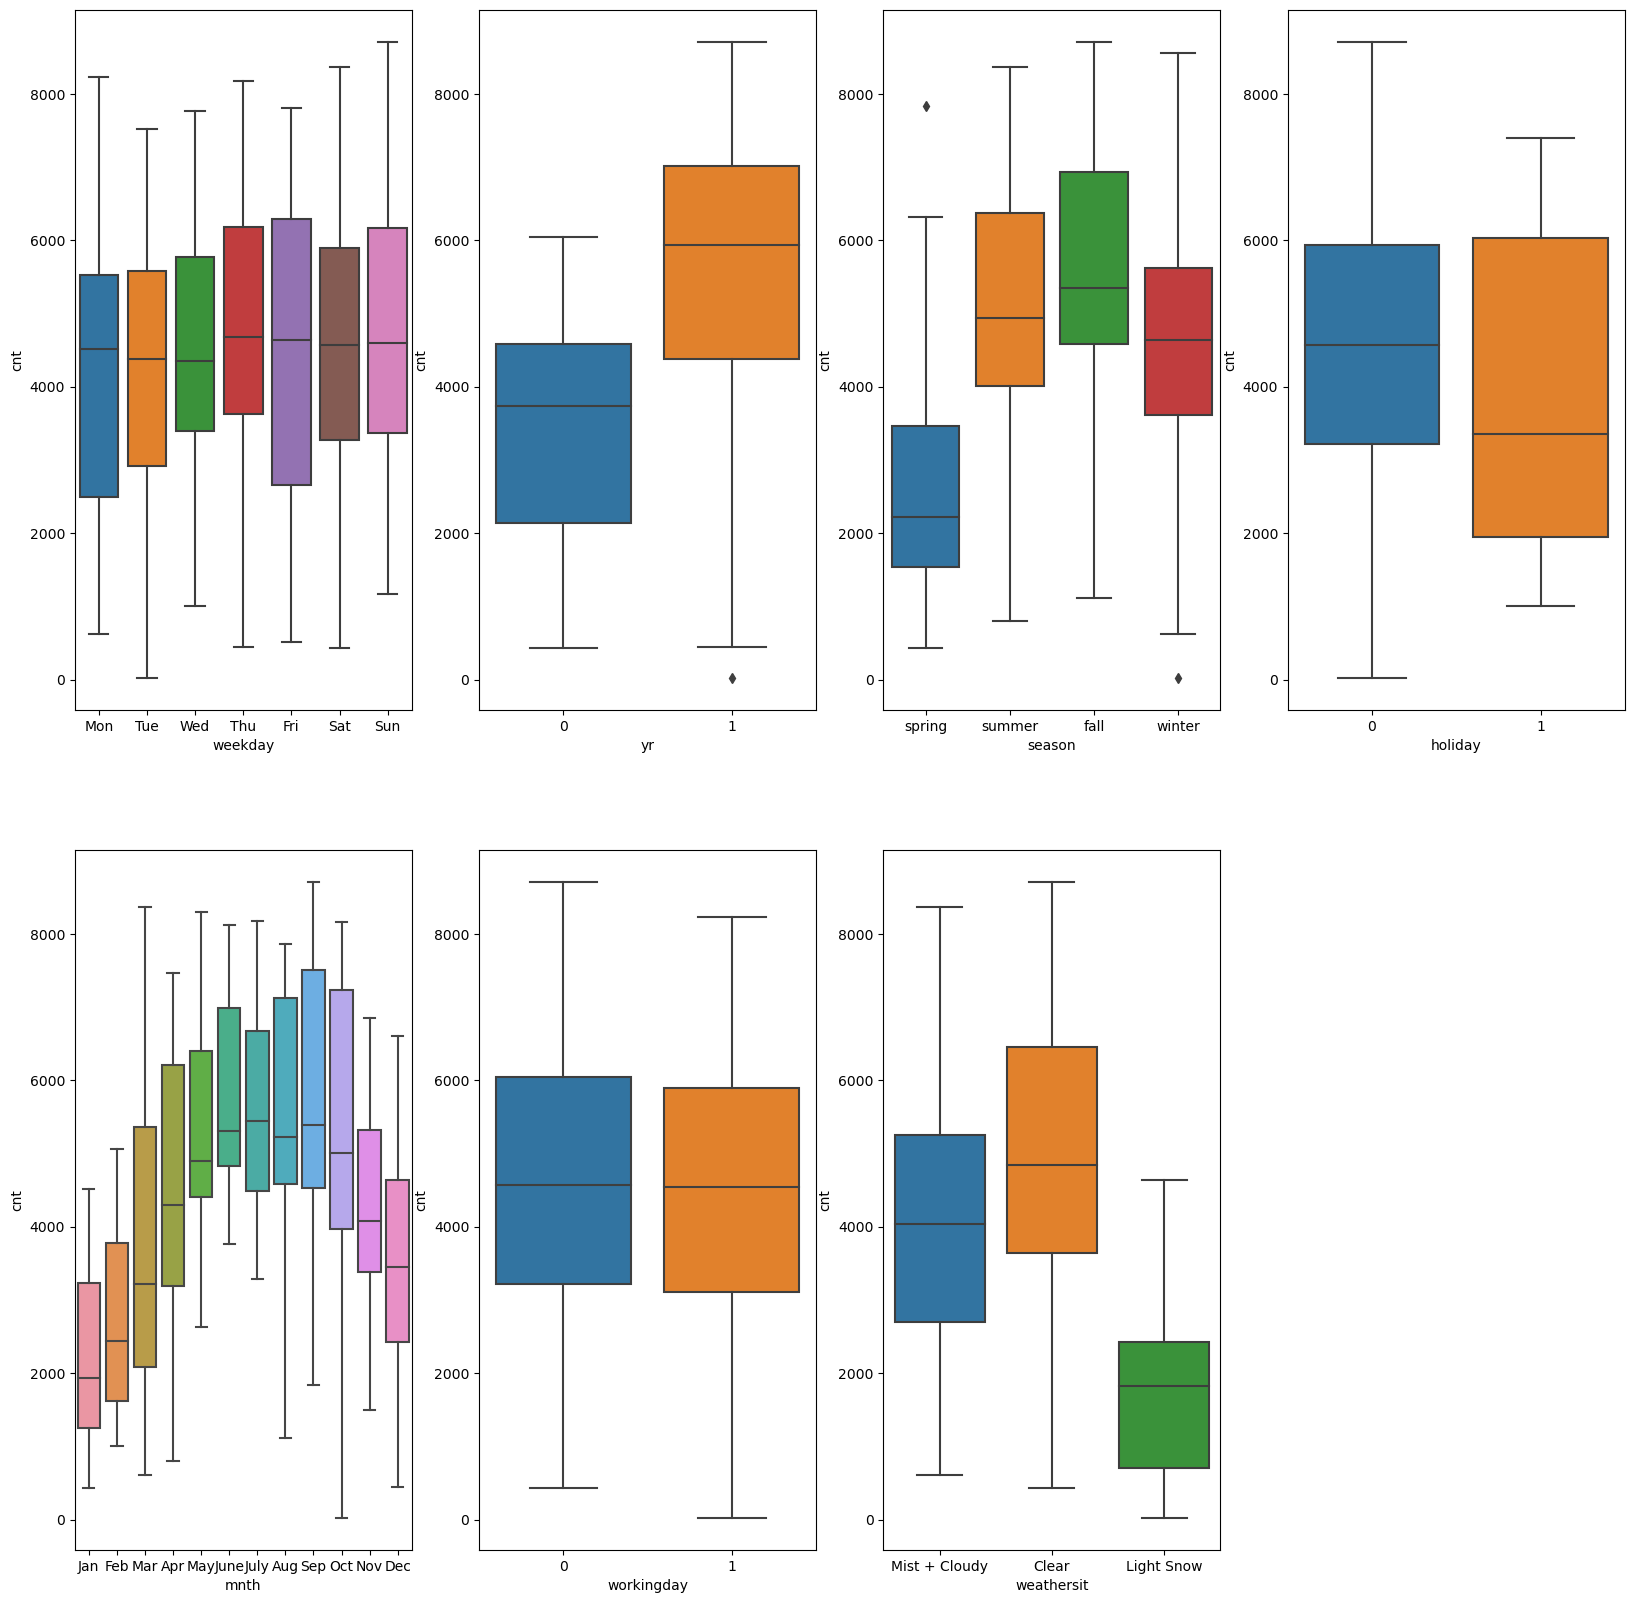

In [11]:
# lets check some categorial variables that we converted 
plt.figure(figsize=(20, 20))
plt.subplot(2, 4, 1)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(2, 4, 2)
sns.boxplot(x='yr', y='cnt',  data=df)
plt.subplot(2, 4, 3)
sns.boxplot(x='season',  y='cnt', data=df)
plt.subplot(2, 4, 4)
sns.boxplot(x='holiday',  y='cnt', data=df)
plt.subplot(2, 4, 5)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt',  data=df)
plt.subplot(2, 4, 7)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.show()

Following are a few findings from the plots above:
1) The summer and fall seasons are the times when people are more likely to rent bicycles

2) September and October have the highest bike rental rates.

3) More bikes are hired on Saturdays, Wednesdays, and Thursdays.

4) Clear skies are preferred for bike rentals.

5) In 2019, more motorcycles were hired.

6) The price of renting a bike doesn't significantly change depending on whether it's a working day or not.

7) Holidays have increased bike rental rates


In [12]:
# Lets now have a heatmap to have a more good idea of co-relation

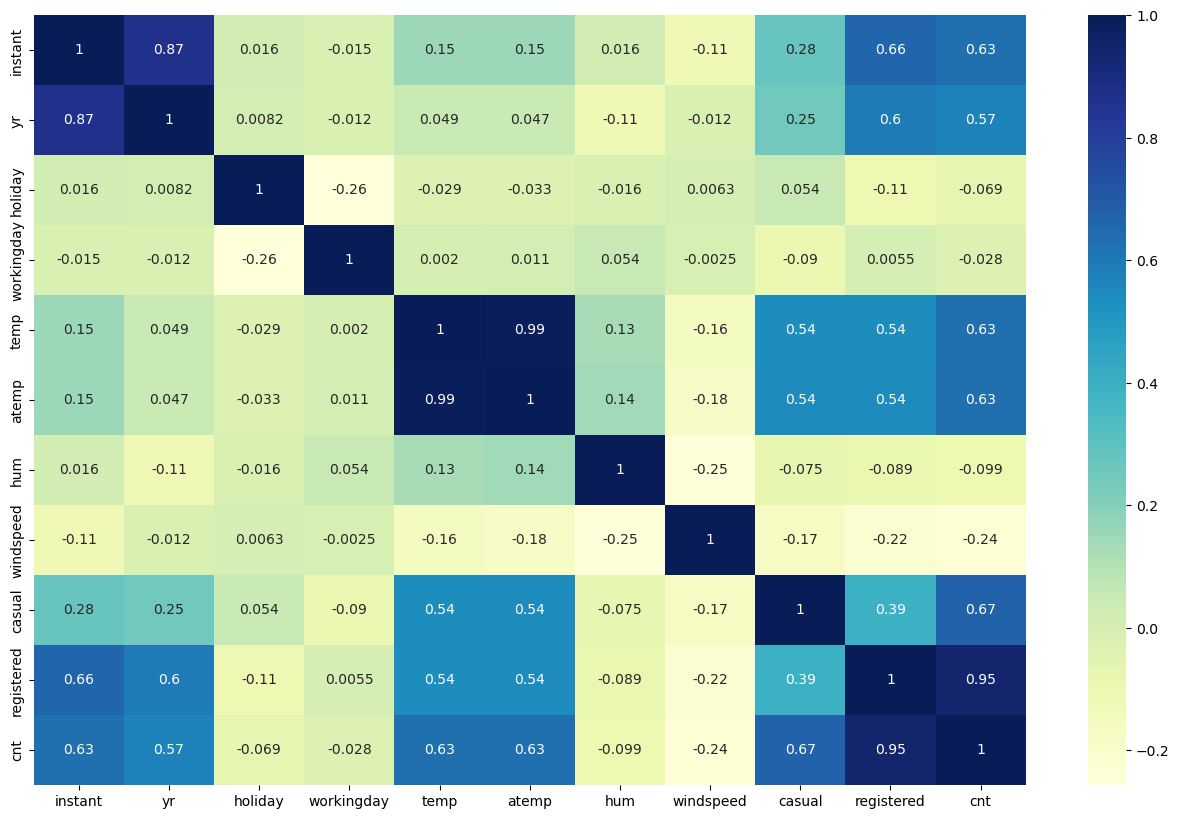

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

- # It can be seen that many variables are related to 'cnt' variable.

In [14]:
# dropping some variables
df = df.drop(['registered','atemp', 'dteday', 'instant','casual' ], axis=1)

In [15]:
df

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0    spring   0  Jan        0     Mon           1  Mist + Cloudy  14.110847   
1    spring   0  Jan        0     Tue           1  Mist + Cloudy  14.902598   
2    spring   0  Jan        0     Wed           1          Clear   8.050924   
3    spring   0  Jan        0     Thu           1          Clear   8.200000   
4    spring   0  Jan        0     Fri           1          Clear   9.305237   
..      ...  ..  ...      ...     ...         ...            ...        ...   
725  spring   1  Dec        0     Fri           1  Mist + Cloudy  10.420847   
726  spring   1  Dec        0     Sat           0  Mist + Cloudy  10.386653   
727  spring   1  Dec        0     Sun           0  Mist + Cloudy  10.386653   
728  spring   1  Dec        0     Mon           1          Clear  10.489153   
729  spring   1  Dec        0     Tue           1  Mist + Cloudy   8.849153   

         hum  windspeed   cnt  
0    80.5833  10.749882   985  
1    69.6087  16.652113   801  
2    43.7273  16.636703  1349  
3    59.0435  10.739832  1562  
4    43.6957  12.522300  1600  
..       ...        ...   ...  
725  65.2917  23.458911  2114  
726  59.0000  10.416557  3095  
727  75.2917   8.333661  1341  
728  48.3333  23.500518  1796  
729  57.7500  10.374682  2729  

[730 rows x 11 columns]

In [16]:
df.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.690411   20.319259   62.765175   12.763620   
std      0.500343    0.167266    0.462641    7.506729   14.237589    5.195841   
min      0.000000    0.000000    0.000000    2.424346    0.000000    1.500244   
25%      0.000000    0.000000    0.000000   13.811885   52.000000    9.041650   
50%      0.500000    0.000000    1.000000   20.465826   62.625000   12.125325   
75%      1.000000    0.000000    1.000000   26.880615   72.989575   15.625589   
max      1.000000    1.000000    1.000000   35.328347   97.250000   34.000021   

               cnt  
count   730.000000  
mean   4508.006849  
std    1936.011647  
min      22.000000  
25%    3169.750000  
50%    4548.500000  
75%    5966.000000  
max    8714.000000

# Lets start model building

In [17]:
# dummy variable creation
weekday=pd.get_dummies(df.weekday)
season=pd.get_dummies(df.season)
weathersit=pd.get_dummies(df.weathersit)
month=pd.get_dummies(df.mnth)
# joinig them to df
df=pd.concat([df,weekday,season,weathersit,month],axis=1)

In [18]:
df

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0    spring   0  Jan        0     Mon           1  Mist + Cloudy  14.110847   
1    spring   0  Jan        0     Tue           1  Mist + Cloudy  14.902598   
2    spring   0  Jan        0     Wed           1          Clear   8.050924   
3    spring   0  Jan        0     Thu           1          Clear   8.200000   
4    spring   0  Jan        0     Fri           1          Clear   9.305237   
..      ...  ..  ...      ...     ...         ...            ...        ...   
725  spring   1  Dec        0     Fri           1  Mist + Cloudy  10.420847   
726  spring   1  Dec        0     Sat           0  Mist + Cloudy  10.386653   
727  spring   1  Dec        0     Sun           0  Mist + Cloudy  10.386653   
728  spring   1  Dec        0     Mon           1          Clear  10.489153   
729  spring   1  Dec        0     Tue           1  Mist + Cloudy   8.849153   

         hum  windspeed  ...  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  \
0    80.5833  10.749882  ...    0    0    1     0     0    0    0    0    0   
1    69.6087  16.652113  ...    0    0    1     0     0    0    0    0    0   
2    43.7273  16.636703  ...    0    0    1     0     0    0    0    0    0   
3    59.0435  10.739832  ...    0    0    1     0     0    0    0    0    0   
4    43.6957  12.522300  ...    0    0    1     0     0    0    0    0    0   
..       ...        ...  ...  ...  ...  ...   ...   ...  ...  ...  ...  ...   
725  65.2917  23.458911  ...    1    0    0     0     0    0    0    0    0   
726  59.0000  10.416557  ...    1    0    0     0     0    0    0    0    0   
727  75.2917   8.333661  ...    1    0    0     0     0    0    0    0    0   
728  48.3333  23.500518  ...    1    0    0     0     0    0    0    0    0   
729  57.7500  10.374682  ...    1    0    0     0     0    0    0    0    0   

     Sep  
0      0  
1      0  
2      0  
3      0  
4      0  
..   ...  
725    0  
726    0  
727    0  
728    0  
729    0  

[730 rows x 37 columns]

In [19]:
# dropping the variables whose dummies we have created 
df.drop(['mnth','weekday','weathersit','season','Fri','fall','Clear','Apr'],axis=1,inplace=True)
#df=df.drop(['Fri','fall','Clear','Apr'],axis=1)


In [20]:
df

yr  holiday  workingday       temp      hum  windspeed   cnt  Mon  Sat  \
0     0        0           1  14.110847  80.5833  10.749882   985    1    0   
1     0        0           1  14.902598  69.6087  16.652113   801    0    0   
2     0        0           1   8.050924  43.7273  16.636703  1349    0    0   
3     0        0           1   8.200000  59.0435  10.739832  1562    0    0   
4     0        0           1   9.305237  43.6957  12.522300  1600    0    0   
..   ..      ...         ...        ...      ...        ...   ...  ...  ...   
725   1        0           1  10.420847  65.2917  23.458911  2114    0    0   
726   1        0           0  10.386653  59.0000  10.416557  3095    0    1   
727   1        0           0  10.386653  75.2917   8.333661  1341    0    0   
728   1        0           1  10.489153  48.3333  23.500518  1796    1    0   
729   1        0           1   8.849153  57.7500  10.374682  2729    0    0   

     Sun  ...  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep  
0      0  ...    0    0    1     0     0    0    0    0    0    0  
1      0  ...    0    0    1     0     0    0    0    0    0    0  
2      0  ...    0    0    1     0     0    0    0    0    0    0  
3      0  ...    0    0    1     0     0    0    0    0    0    0  
4      0  ...    0    0    1     0     0    0    0    0    0    0  
..   ...  ...  ...  ...  ...   ...   ...  ...  ...  ...  ...  ...  
725    0  ...    1    0    0     0     0    0    0    0    0    0  
726    0  ...    1    0    0     0     0    0    0    0    0    0  
727    1  ...    1    0    0     0     0    0    0    0    0    0  
728    0  ...    1    0    0     0     0    0    0    0    0    0  
729    0  ...    1    0    0     0     0    0    0    0    0    0  

[730 rows x 29 columns]

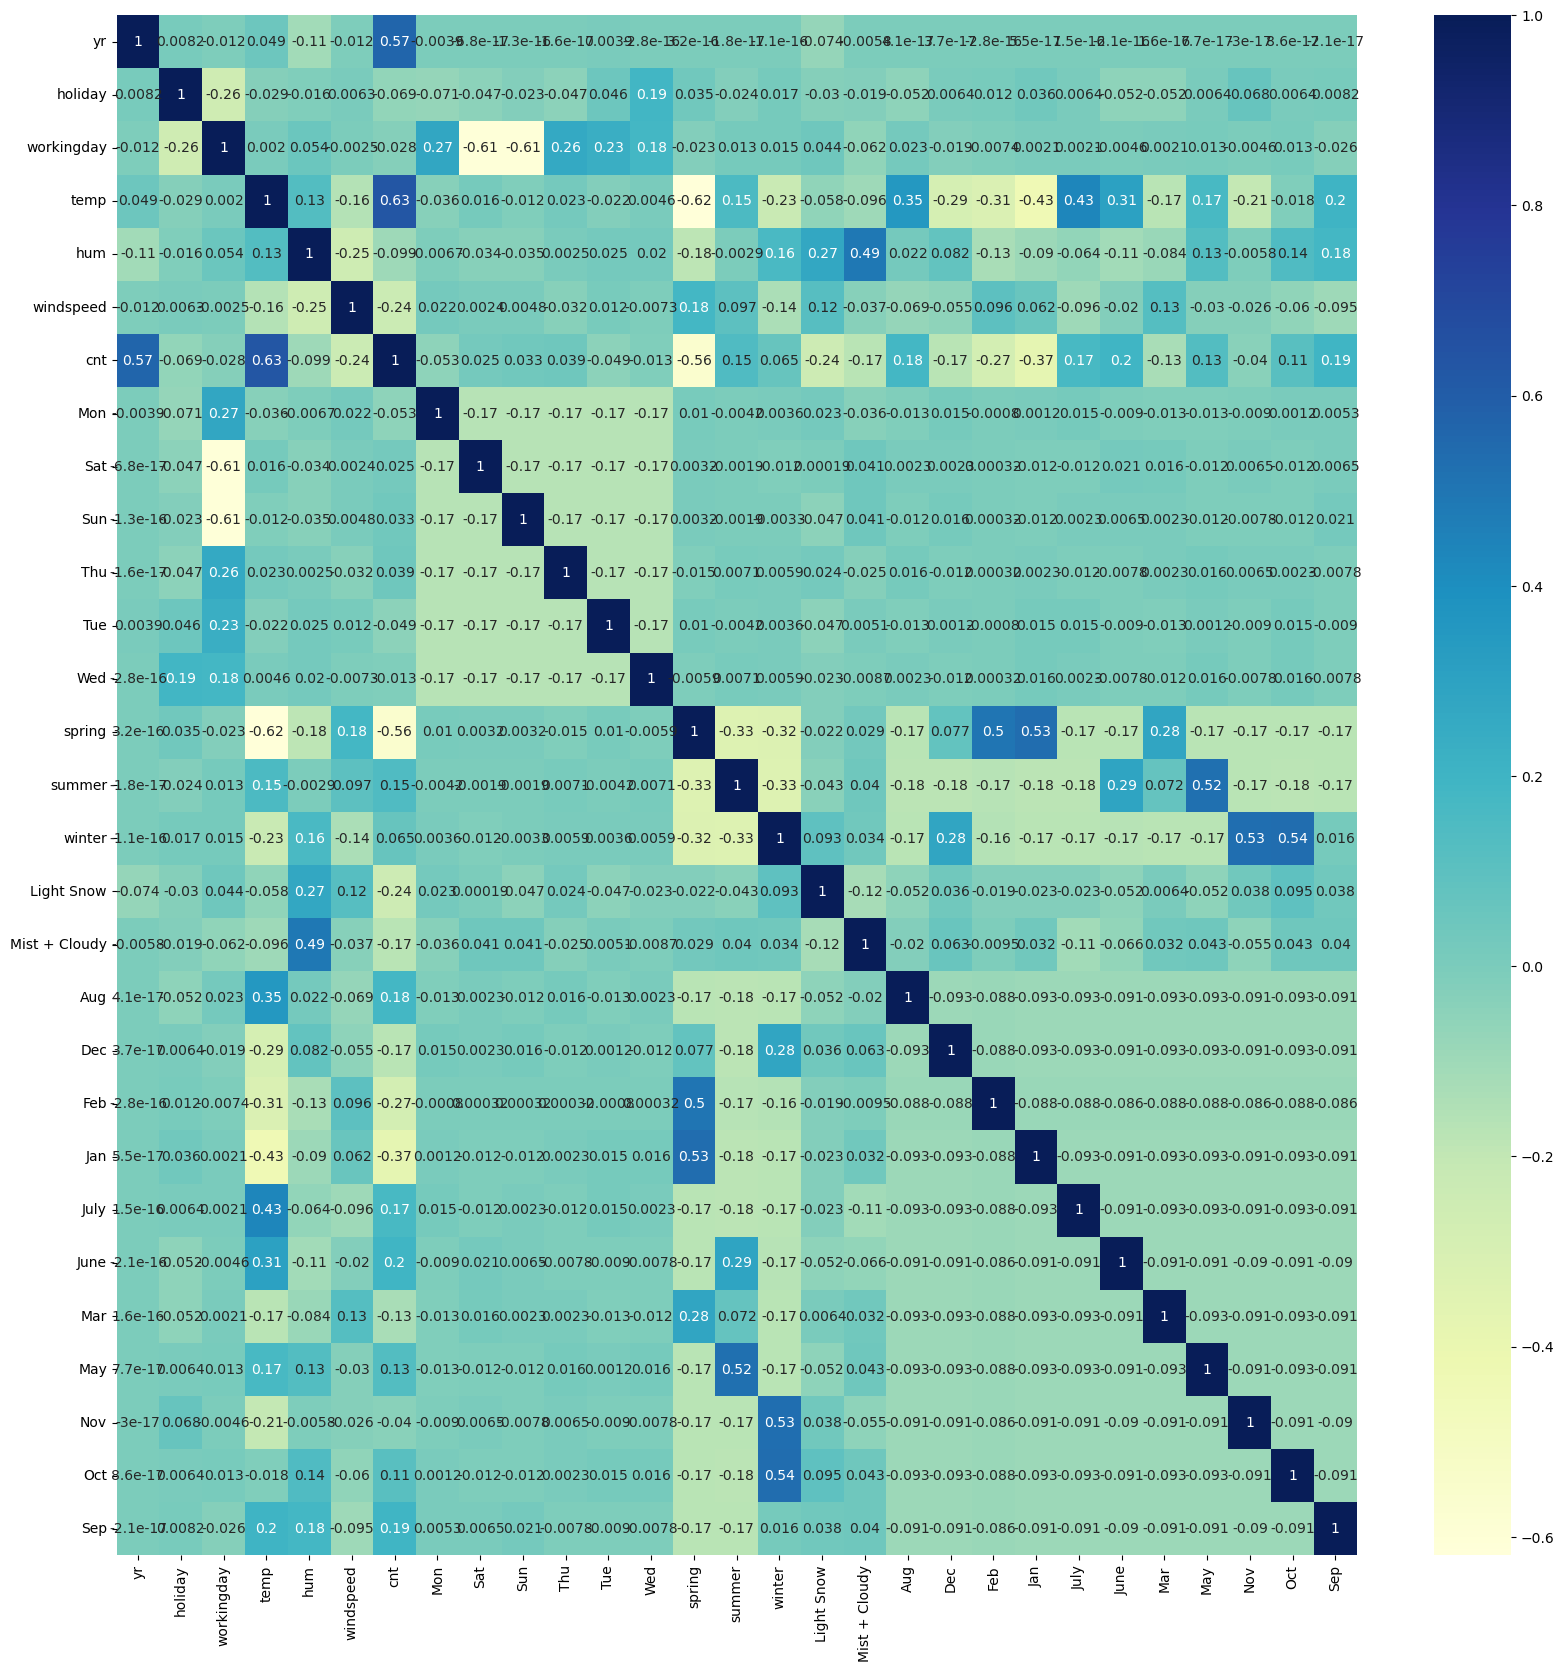

In [21]:
# Lets have another heatmap to check co-relations
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [22]:
# Lets start splitting the set into test and train frames
df_trian,df_test=train_test_split(df,train_size=.7,random_state=100)
print(df_trian.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [23]:
scaler=MinMaxScaler()
# creating list of numeric variables
num_vars=['temp','cnt','hum','windspeed']

In [24]:
#step2
df_trian[num_vars]=scaler.fit_transform(df_trian[num_vars])
df_trian[num_vars]
# now we can see all numeric varibles are now mapped between 0 and 1 

temp       cnt       hum  windspeed
576  0.815169  0.827658  0.725633   0.264686
426  0.442393  0.465255  0.640189   0.255342
728  0.245101  0.204096  0.498067   0.663106
482  0.395666  0.482973  0.504508   0.188475
111  0.345824  0.191095  0.751824   0.380981
..        ...       ...       ...        ...
578  0.863973  0.832835  0.679690   0.187140
53   0.202618  0.218017  0.435939   0.111379
350  0.248216  0.312586  0.577930   0.431816
79   0.462664  0.236424  0.759870   0.529881
520  0.600225  0.802922  0.632030   0.359599

[510 rows x 4 columns]

In [25]:
df_trian[num_vars].describe()

temp         cnt         hum   windspeed
count  510.000000  510.000000  510.000000  510.000000
mean     0.537440    0.513499    0.650480    0.320883
std      0.225858    0.224421    0.145846    0.169803
min      0.000000    0.000000    0.000000    0.000000
25%      0.339853    0.356420    0.538643    0.199179
50%      0.542596    0.518638    0.653714    0.296763
75%      0.735215    0.684710    0.754830    0.414447
max      1.000000    1.000000    1.000000    1.000000

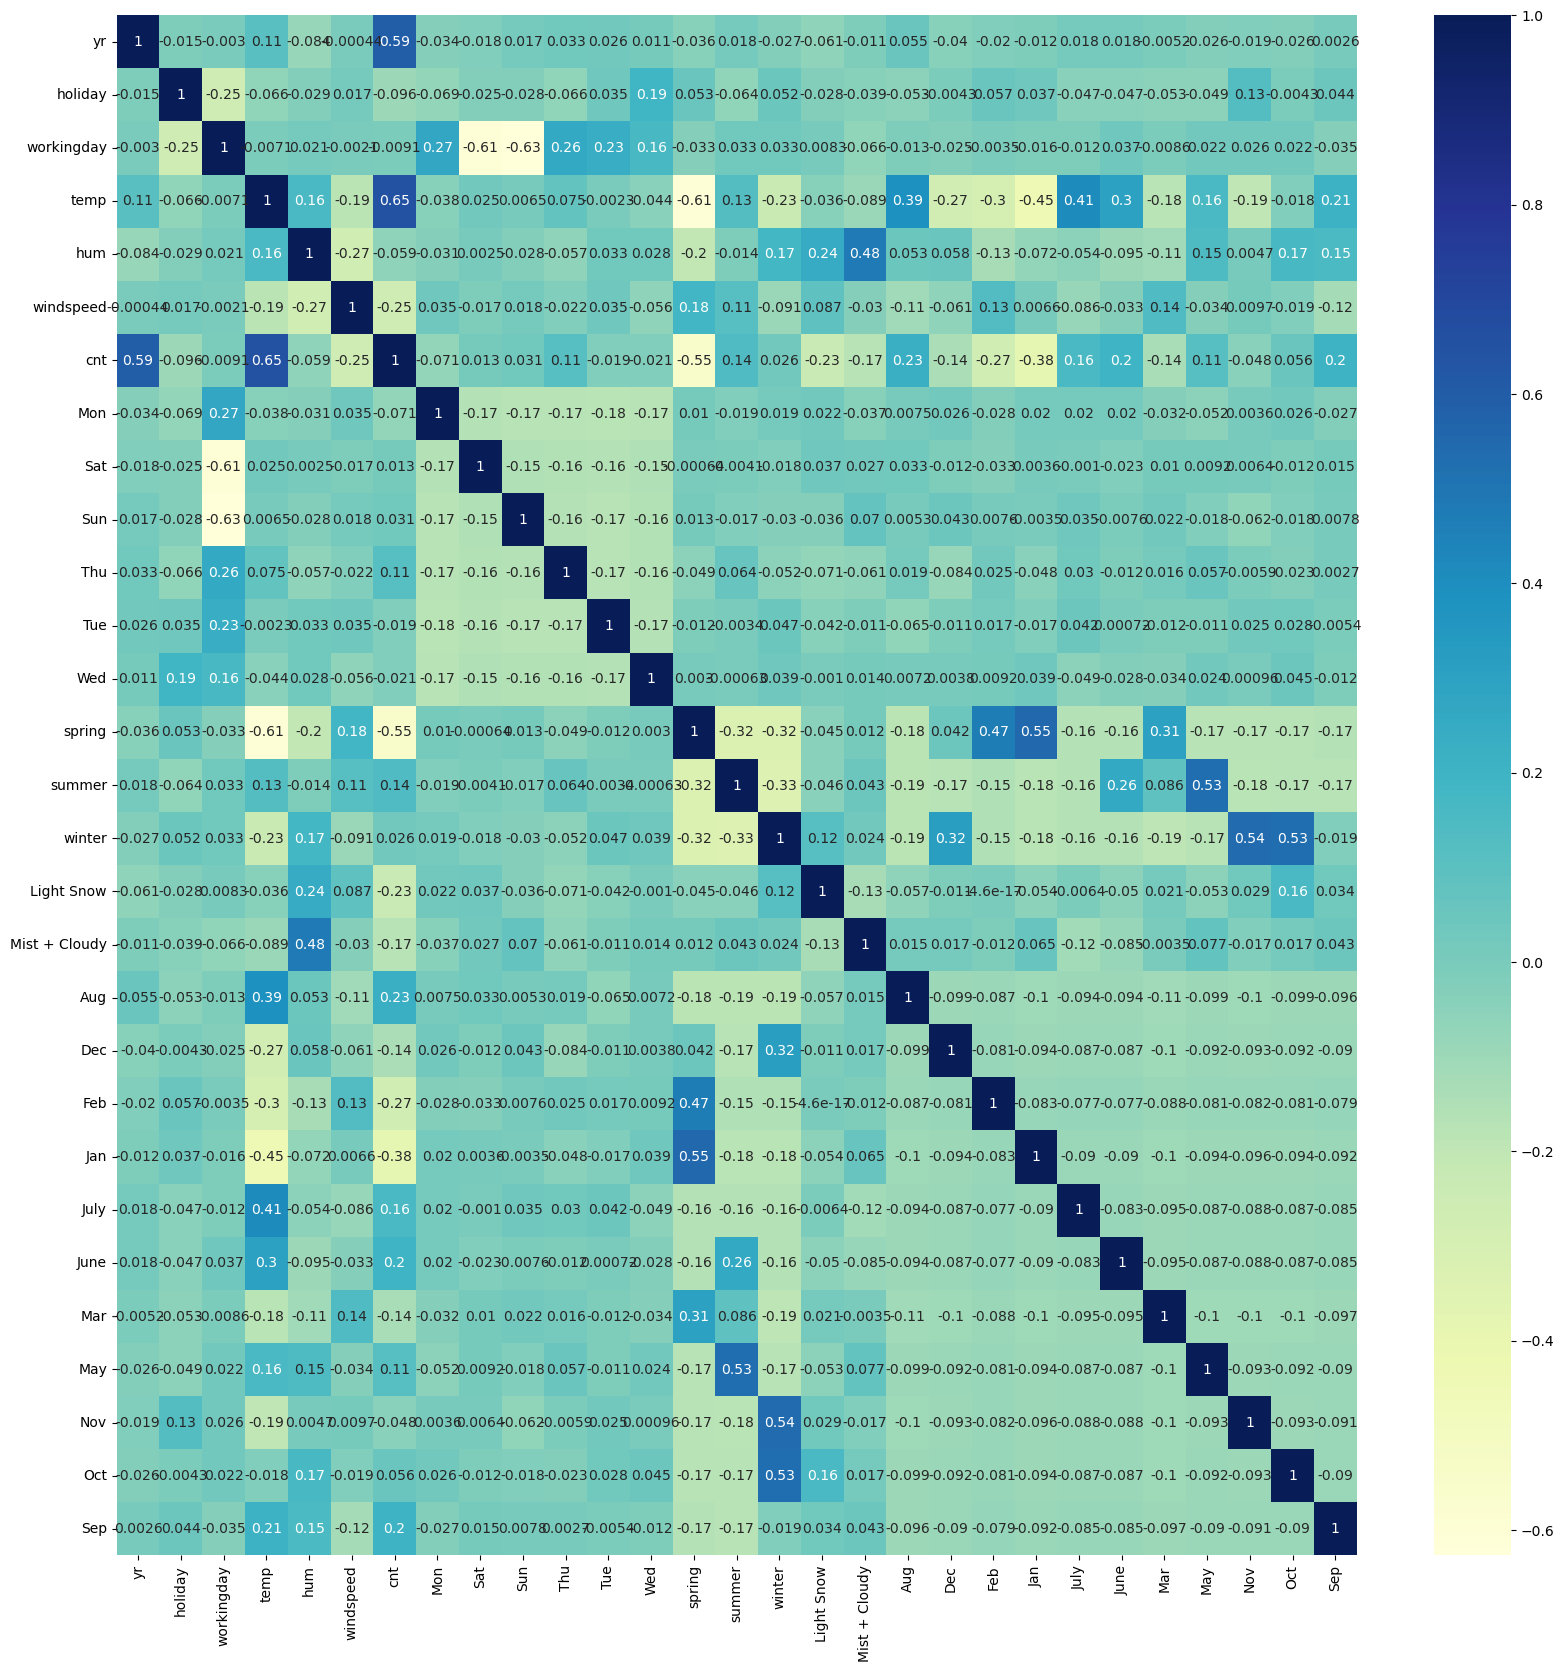

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(df_trian.corr(),annot=True,cmap="YlGnBu")
plt.show()

- It can be observed that the temp variable appears to have a strong correlation with the count. 

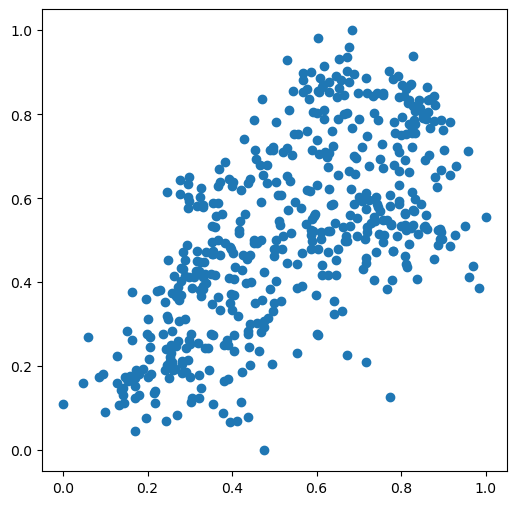

In [27]:
# Lets have an scatter plot for this for a better idea
plt.figure(figsize=[6,6])
plt.scatter(df_trian.temp, df_trian.cnt)
plt.show()

- Yes is showing good co-relation.

In [28]:
# Training the model

y_train = df_trian.pop('cnt')
x_train = df_trian

In [29]:
# adding the constant
x_train_sm=sm.add_constant(x_train['temp'])
# create the first model
lr=sm.OLS(y_train,x_train_sm)
#fit
lr_model=lr.fit()
#params
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [30]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           2.46e-61
Time:                        18:41:26   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-square value is very low i.e 41%

In [31]:
# lets do mutliple regression and see how it effects the model
x_train_sm=sm.add_constant(x_train[['temp','yr']])
x_train_sm=sm.add_constant(x_train_sm)
lr=sm.OLS(y_train,x_train_sm)
#fit
lr_model=lr.fit()
#params
lr_model.params

const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [32]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Sun, 26 Mar 2023   Prob (F-statistic):          3.34e-130
Time:                        18:41:26   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Now R-sqaure value has increased after adding another variable in models to 69% which is a good sign 

In [33]:
# Lets check with all variables present how does model behave 
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const            0.391163
yr               0.231135
holiday         -0.134754
workingday      -0.060049
temp             0.440512
hum             -0.157355
windspeed       -0.182486
Mon             -0.024621
Sat             -0.055719
Sun             -0.049460
Thu              0.004227
Tue             -0.026072
Wed             -0.010225
spring          -0.040386
summer           0.046443
winter           0.112621
Light Snow      -0.249947
Mist + Cloudy   -0.057848
Aug              0.027307
Dec             -0.044387
Feb             -0.037422
Jan             -0.064209
July            -0.028504
June             0.008393
Mar              0.000800
May              0.024732
Nov             -0.039553
Oct              0.005634
Sep              0.090823
dtype: float64

In [34]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Sun, 26 Mar 2023   Prob (F-statistic):          1.34e-178
Time:                        18:41:26   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3912      0.085      4.594      0.000       0.224       0.558
yr                0.2311      0.008     28.384      0.000       0.215       0.247
holiday          -0.1348      0.065     -2.059      0.040      -0.263      -0.006
workingday       -0.0600      0.071     -0.844      0.399      -0.200       0.080
temp              0.4405      0.047      9.412      0.000       0.349       0.532
hum              -0.1574      0.039     -4.043      0.000      -0.234      -0.081
windspeed        -0.1825      0.026     -7.003      0.000      -0.234      -0.131
Mon              -0.0246      0.015     -1.687      0.092      -0.053       0.004
Sat              -0.0557      0.072     -0.777      0.437      -0.197       0.085
Sun              -0.0495      0.072     -0.691      0.490      -0.190       0.091
Thu               0.0042      0.015      0.282      0.778      -0.025       0.034
Tue              -0.0261      0.015     -1.774      0.077      -0.055       0.003
Wed              -0.0102      0.015     -0.669      0.504      -0.040       0.020
spring           -0.0404      0.030     -1.335      0.182      -0.100       0.019
summer            0.0464      0.026      1.761      0.079      -0.005       0.098
winter            0.1126      0.028      3.994      0.000       0.057       0.168
Light Snow       -0.2499      0.027     -9.380      0.000      -0.302      -0.198
Mist + Cloudy    -0.0578      0.011     -5.495      0.000      -0.079      -0.037
Aug               0.0273      0.034      0.806      0.421      -0.039       0.094
Dec              -0.0444      0.034     -1.309      0.191      -0.111       0.022
Feb              -0.0374      0.033     -1.123      0.262      -0.103       0.028
Jan              -0.0642      0.034     -1.894      0.059      -0.131       0.002
July             -0.0285      0.035     -0.808      0.420      -0.098       0.041
June              0.0084      0.025      0.336      0.737      -0.041       0.058
Mar               0.0008      0.025      0.032      0.974      -0.048       0.050
May               0.0247      0.021      1.164      0.245      -0.017       0.066
Nov              -0.0396      0.037     -1.077      0.282      -0.112       0.033
Oct               0.0056      0.036      0.156      0.876      -0.066       0.077
Sep               0.0908      0.032      2.822      0.005       0.028       0.154
==============================================================================
Omnibus:                       78.047   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.442
Skew:                          -0.762   Prob(JB):                     2.45e-45
Kurtosis:                       5.710   Cond. No.                         70.4
================================================================

- with all variables it R-sqaure value has drastically increased to 85%

# Trying RFE approach
We used the manual feature selection method to determine the R-squared values and
the best fit lines. We will now choose the parameters needed to create the best optimised 
models automatically, eliminating the values that are unnecessary for our model-building strategy.
Now that we have automated our technique, we will use RFE and VIF to choose which variables to eliminate.


In [36]:
#creating the RFE object
lm = LinearRegression()
lm.fit(x_train, y_train)

#setting feature selection variables to 15
rfe = RFE(lm, n_features_to_select = 15) 

#fitting rfe ofject on our training dataset
rfe = rfe.fit(x_train, y_train)

In [37]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1)]

In [38]:
# selected feature in 1 variable
true_rfe=x_train.columns[rfe.support_]
true_rfe

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Light Snow', 'Mist + Cloudy', 'Dec', 'Jan', 'July', 'Nov',
       'Sep'],
      dtype='object')

In [39]:
x_train_rfe=x_train[true_rfe]
# creating the first Rfe model
x_train_rfe=sm.add_constant(x_train_rfe)
lr_model=lr.fit()
lr_model.params

const            0.391163
yr               0.231135
holiday         -0.134754
workingday      -0.060049
temp             0.440512
hum             -0.157355
windspeed       -0.182486
Mon             -0.024621
Sat             -0.055719
Sun             -0.049460
Thu              0.004227
Tue             -0.026072
Wed             -0.010225
spring          -0.040386
summer           0.046443
winter           0.112621
Light Snow      -0.249947
Mist + Cloudy   -0.057848
Aug              0.027307
Dec             -0.044387
Feb             -0.037422
Jan             -0.064209
July            -0.028504
June             0.008393
Mar              0.000800
May              0.024732
Nov             -0.039553
Oct              0.005634
Sep              0.090823
dtype: float64

In [40]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Sun, 26 Mar 2023   Prob (F-statistic):          1.34e-178
Time:                        18:41:26   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3912      0.085      4.594      0.000       0.224       0.558
yr                0.2311      0.008     28.384      0.000       0.215       0.247
holiday          -0.1348      0.065     -2.059      0.040      -0.263      -0.006
workingday       -0.0600      0.071     -0.844      0.399      -0.200       0.080
temp              0.4405      0.047      9.412      0.000       0.349       0.532
hum              -0.1574      0.039     -4.043      0.000      -0.234      -0.081
windspeed        -0.1825      0.026     -7.003      0.000      -0.234      -0.131
Mon              -0.0246      0.015     -1.687      0.092      -0.053       0.004
Sat              -0.0557      0.072     -0.777      0.437      -0.197       0.085
Sun              -0.0495      0.072     -0.691      0.490      -0.190       0.091
Thu               0.0042      0.015      0.282      0.778      -0.025       0.034
Tue              -0.0261      0.015     -1.774      0.077      -0.055       0.003
Wed              -0.0102      0.015     -0.669      0.504      -0.040       0.020
spring           -0.0404      0.030     -1.335      0.182      -0.100       0.019
summer            0.0464      0.026      1.761      0.079      -0.005       0.098
winter            0.1126      0.028      3.994      0.000       0.057       0.168
Light Snow       -0.2499      0.027     -9.380      0.000      -0.302      -0.198
Mist + Cloudy    -0.0578      0.011     -5.495      0.000      -0.079      -0.037
Aug               0.0273      0.034      0.806      0.421      -0.039       0.094
Dec              -0.0444      0.034     -1.309      0.191      -0.111       0.022
Feb              -0.0374      0.033     -1.123      0.262      -0.103       0.028
Jan              -0.0642      0.034     -1.894      0.059      -0.131       0.002
July             -0.0285      0.035     -0.808      0.420      -0.098       0.041
June              0.0084      0.025      0.336      0.737      -0.041       0.058
Mar               0.0008      0.025      0.032      0.974      -0.048       0.050
May               0.0247      0.021      1.164      0.245      -0.017       0.066
Nov              -0.0396      0.037     -1.077      0.282      -0.112       0.033
Oct               0.0056      0.036      0.156      0.876      -0.066       0.077
Sep               0.0908      0.032      2.822      0.005       0.028       0.154
==============================================================================
Omnibus:                       78.047   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.442
Skew:                          -0.762   Prob(JB):                     2.45e-45
Kurtosis:                       5.710   Cond. No.                         70.4
================================================================

In [41]:
# Creating a VIF model
x_train_rfe = x_train_rfe.drop(['const'], axis = 1)
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
3             hum  30.89
2            temp  17.79
4       windspeed   4.72
5          spring   4.37
7          winter   4.06
6          summer   2.82
9   Mist + Cloudy   2.32
0              yr   2.09
13            Nov   1.85
11            Jan   1.75
12           July   1.59
10            Dec   1.56
14            Sep   1.41
8      Light Snow   1.28
1         holiday   1.06

# Lets remove some variables for better accuracy 


In [48]:
# Dropping 'hum' as is has low VIF value and high p-value
x_train_new_2 = x_train_rfe.drop(['hum'], axis = 1)
#x_train_new_1 = x_train_lr1.drop(['Sat'], axis = 1)
x_train_lr2=sm.add_constant(x_train_new_2)
lr=sm.OLS(y_train,x_train_lr2)
lr_model=lr.fit()

In [49]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 27 Mar 2023   Prob (F-statistic):          4.75e-186
Time:                        13:31:39   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2450      0.032      7.618      0.000       0.182       0.308
yr                0.2345      0.008     28.687      0.000       0.218       0.251
holiday          -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp              0.4387      0.036     12.093      0.000       0.367       0.510
windspeed        -0.1585      0.025     -6.276      0.000      -0.208      -0.109
spring           -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer            0.0349      0.015      2.251      0.025       0.004       0.065
winter            0.0869      0.018      4.831      0.000       0.052       0.122
Light Snow       -0.2917      0.025    -11.840      0.000      -0.340      -0.243
Mist + Cloudy    -0.0801      0.009     -9.198      0.000      -0.097      -0.063
Dec              -0.0428      0.018     -2.413      0.016      -0.078      -0.008
Jan              -0.0500      0.018     -2.719      0.007      -0.086      -0.014
July             -0.0500      0.019     -2.703      0.007      -0.086      -0.014
Nov              -0.0395      0.019     -2.064      0.040      -0.077      -0.002
Sep               0.0687      0.017      4.015      0.000       0.035       0.102
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
x_train_new_3 = x_train_new_2.drop(['windspeed'], axis = 1)
#x_train_new_1 = x_train_lr1.drop(['Sat'], axis = 1)
x_train_lr3=sm.add_constant(x_train_new_3)
lr=sm.OLS(y_train,x_train_lr3)
lr_model=lr.fit()

In [55]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.6
Date:                Mon, 27 Mar 2023   Prob (F-statistic):          5.35e-179
Time:                        13:37:25   Log-Likelihood:                 485.33
No. Observations:                 510   AIC:                            -942.7
Df Residuals:                     496   BIC:                            -883.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1837      0.032      5.775      0.000       0.121       0.246
yr                0.2332      0.008     27.496      0.000       0.217       0.250
holiday          -0.0941      0.027     -3.480      0.001      -0.147      -0.041
temp              0.4624      0.037     12.346      0.000       0.389       0.536
spring           -0.0830      0.022     -3.734      0.000      -0.127      -0.039
summer            0.0266      0.016      1.661      0.097      -0.005       0.058
winter            0.0902      0.019      4.834      0.000       0.054       0.127
Light Snow       -0.3060      0.025    -12.014      0.000      -0.356      -0.256
Mist + Cloudy    -0.0787      0.009     -8.707      0.000      -0.096      -0.061
Dec              -0.0332      0.018     -1.810      0.071      -0.069       0.003
Jan              -0.0333      0.019     -1.765      0.078      -0.070       0.004
July             -0.0512      0.019     -2.663      0.008      -0.089      -0.013
Nov              -0.0415      0.020     -2.091      0.037      -0.081      -0.003
Sep               0.0739      0.018      4.167      0.000       0.039       0.109
==============================================================================
Omnibus:                       76.508   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.076
Skew:                          -0.740   Prob(JB):                     1.78e-45
Kurtosis:                       5.740   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif = pd.DataFrame()
X = x_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
2            temp  4.30
5          winter  2.81
3          spring  2.12
0              yr  2.07
4          summer  1.94
11            Nov  1.79
9             Jan  1.65
10           July  1.59
7   Mist + Cloudy  1.56
8             Dec  1.47
12            Sep  1.35
6      Light Snow  1.07
1         holiday  1.06

In [60]:
x_train_new_4 = x_train_new_3.drop(['July'], axis = 1) # as it has low p and VIF value
#x_train_new_1 = x_train_lr1.drop(['Sat'], axis = 1)
x_train_lr4=sm.add_constant(x_train_new_4)
lr=sm.OLS(y_train,x_train_lr4)
lr_model=lr.fit()

In [61]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     193.7
Date:                Mon, 27 Mar 2023   Prob (F-statistic):          1.25e-178
Time:                        13:40:03   Log-Likelihood:                 481.71
No. Observations:                 510   AIC:                            -937.4
Df Residuals:                     497   BIC:                            -882.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1761      0.032      5.525      0.000       0.114       0.239
yr                0.2338      0.009     27.407      0.000       0.217       0.251
holiday          -0.0930      0.027     -3.419      0.001      -0.146      -0.040
temp              0.4482      0.037     12.018      0.000       0.375       0.522
spring           -0.0712      0.022     -3.248      0.001      -0.114      -0.028
summer            0.0417      0.015      2.761      0.006       0.012       0.071
winter            0.1024      0.018      5.623      0.000       0.067       0.138
Light Snow       -0.3070      0.026    -11.980      0.000      -0.357      -0.257
Mist + Cloudy    -0.0772      0.009     -8.510      0.000      -0.095      -0.059
Dec              -0.0337      0.018     -1.827      0.068      -0.070       0.003
Jan              -0.0355      0.019     -1.870      0.062      -0.073       0.002
Nov              -0.0413      0.020     -2.068      0.039      -0.081      -0.002
Sep               0.0878      0.017      5.144      0.000       0.054       0.121
==============================================================================
Omnibus:                       78.127   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.916
Skew:                          -0.764   Prob(JB):                     3.18e-45
Kurtosis:                       5.703   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif = pd.DataFrame()
X = x_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
2            temp  2.93
5          winter  2.64
0              yr  2.07
3          spring  2.01
10            Nov  1.79
9             Jan  1.64
4          summer  1.63
7   Mist + Cloudy  1.56
8             Dec  1.46
11            Sep  1.25
6      Light Snow  1.07
1         holiday  1.06

In [63]:
x_train_new_5 = x_train_new_3.drop(['Nov','Jan'], axis = 1) # as it has low p and high VIF value
#x_train_new_1 = x_train_lr1.drop(['Sat'], axis = 1)
x_train_lr5=sm.add_constant(x_train_new_5)
lr=sm.OLS(y_train,x_train_lr5)
lr_model=lr.fit()

In [64]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.0
Date:                Mon, 27 Mar 2023   Prob (F-statistic):          6.68e-180
Time:                        13:45:10   Log-Likelihood:                 481.94
No. Observations:                 510   AIC:                            -939.9
Df Residuals:                     498   BIC:                            -889.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1541      0.030      5.177      0.000       0.096       0.213
yr                0.2325      0.009     27.312      0.000       0.216       0.249
holiday          -0.1010      0.027     -3.744      0.000      -0.154      -0.048
temp              0.4983      0.035     14.307      0.000       0.430       0.567
spring           -0.0778      0.022     -3.558      0.000      -0.121      -0.035
summer            0.0355      0.016      2.254      0.025       0.005       0.066
winter            0.0842      0.018      4.692      0.000       0.049       0.119
Light Snow       -0.3001      0.025    -11.775      0.000      -0.350      -0.250
Mist + Cloudy    -0.0785      0.009     -8.672      0.000      -0.096      -0.061
Dec              -0.0127      0.017     -0.766      0.444      -0.045       0.020
July             -0.0523      0.019     -2.710      0.007      -0.090      -0.014
Sep               0.0803      0.018      4.559      0.000       0.046       0.115
==============================================================================
Omnibus:                       67.974   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.202
Skew:                          -0.685   Prob(JB):                     1.81e-37
Kurtosis:                       5.467   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
vif = pd.DataFrame()
X = x_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
2            temp  4.22
0              yr  2.06
4          summer  1.94
5          winter  1.82
9            July  1.58
7   Mist + Cloudy  1.55
3          spring  1.44
10            Sep  1.34
8             Dec  1.26
6      Light Snow  1.07
1         holiday  1.04

# Some conculsions can be drawn from here are

- We may reject the null hypothesis because all of the selected variables have low (0.05) or almost zero p-values.

- The p-value, the VIF, and the R-squared value are only a few of the variables that affect which model is chosen. The p-value provides information on the variables' significance, the VIF describes the correlation between the contributing variables, and the R-squared value provides information on the model's robustness. This number indicates the proportion of the dependent variable's variance that the independent variables account for collectively.

- With all the variables, we have met the criteria that the VIF should normally be 5.
- The independent variables were carefully chosen to help us map the variation of the dependent variable, count, and the R-squared value obtained is 82.7%, suggesting a good correlation between the dependent variable (count) and the independent variables.









# Time has come to do the Residual analysis

In [67]:
x_train_lr5 = sm.add_constant(x_train_lr5)
x_train_lr5

const  yr  holiday      temp  spring  summer  winter  Light Snow  \
576    1.0   1        0  0.815169       0       0       0           0   
426    1.0   1        0  0.442393       1       0       0           0   
728    1.0   1        0  0.245101       1       0       0           0   
482    1.0   1        0  0.395666       0       1       0           0   
111    1.0   0        0  0.345824       0       1       0           0   
..     ...  ..      ...       ...     ...     ...     ...         ...   
578    1.0   1        0  0.863973       0       0       0           0   
53     1.0   0        0  0.202618       1       0       0           0   
350    1.0   0        0  0.248216       0       0       1           0   
79     1.0   0        0  0.462664       0       1       0           0   
520    1.0   1        0  0.600225       0       1       0           0   

     Mist + Cloudy  Dec  July  Sep  
576              0    0     1    0  
426              1    0     0    0  
728              0    1     0    0  
482              1    0     0    0  
111              1    0     0    0  
..             ...  ...   ...  ...  
578              0    0     0    0  
53               0    0     0    0  
350              1    1     0    0  
79               1    0     0    0  
520              1    0     0    0  

[510 rows x 12 columns]

In [68]:
y_train_pred = lr_model.predict(x_train_lr5) 

/Users/ashutoshkaushal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


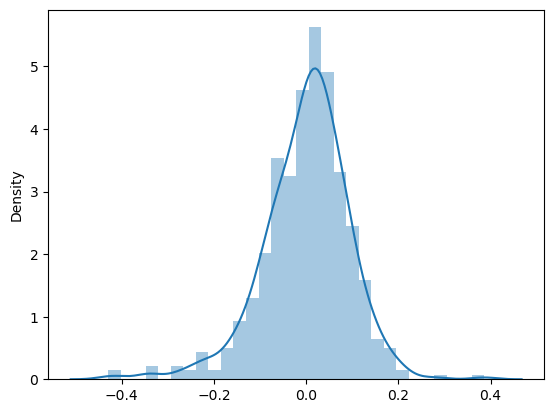

In [69]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

In [73]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [75]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             220 non-null    int64  
 1   holiday        220 non-null    int64  
 2   workingday     220 non-null    int64  
 3   temp           220 non-null    float64
 4   hum            220 non-null    float64
 5   windspeed      220 non-null    float64
 6   cnt            220 non-null    float64
 7   Mon            220 non-null    uint8  
 8   Sat            220 non-null    uint8  
 9   Sun            220 non-null    uint8  
 10  Thu            220 non-null    uint8  
 11  Tue            220 non-null    uint8  
 12  Wed            220 non-null    uint8  
 13  spring         220 non-null    uint8  
 14  summer         220 non-null    uint8  
 15  winter         220 non-null    uint8  
 16  Light Snow     220 non-null    uint8  
 17  Mist + Cloudy  220 non-null    uint8  
 18  Aug     

In [76]:
df_test.describe

<bound method NDFrame.describe of      yr  holiday  workingday      temp       hum  windspeed       cnt  Mon  \
184   0        1           0  0.831783  0.657364   0.084219  0.692706    0   
535   1        0           1  0.901354  0.610133   0.153728  0.712034    0   
299   0        0           0  0.511964  0.837699   0.334206  0.303382    0   
221   0        0           1  0.881625  0.437098   0.339570  0.547400    0   
152   0        0           0  0.817246  0.314298   0.537414  0.569029    0   
..   ..      ...         ...       ...       ...        ...       ...  ...   
702   1        0           1  0.519232  0.756118   0.283397  0.757478    0   
127   0        0           1  0.584649  0.650923   0.069510  0.495973    0   
640   1        0           1  0.745598  0.817947   0.052115  0.868615    0   
72    0        0           1  0.331557  0.512107   0.203418  0.232858    0   
653   1        0           1  0.509887  0.575354   0.300794  0.864243    0   

     Sat  Sun  ...  Dec  Feb 

In [77]:
df_test.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.640909    0.558718    0.638221    0.313293   
std      0.500809    0.187620    0.480828    0.233187    0.148694    0.159584   
min      0.000000    0.000000    0.000000    0.046591    0.261915   -0.042808   
25%      0.000000    0.000000    0.000000    0.355429    0.529197    0.198843   
50%      0.000000    0.000000    1.000000    0.558172    0.625590    0.300126   
75%      1.000000    0.000000    1.000000    0.755981    0.743798    0.402718   
max      1.000000    1.000000    1.000000    0.984424    1.002146    0.807474   

              cnt         Mon         Sat         Sun  ...         Dec  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.522154    0.118182    0.172727    0.154545  ...    0.086364   
std      0.219163    0.323559    0.378873    0.362295  ...    0.281541   
min      0.048205    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.378595    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.524678    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.677750    0.000000    0.000000    0.000000  ...    0.000000   
max      0.963300    1.000000    1.000000    1.000000  ...    1.000000   

              Feb         Jan        July        June         Mar         May  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.100000    0.077273    0.104545    0.095455    0.054545    0.086364   
std      0.300684    0.267633    0.306665    0.294512    0.227609    0.281541   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Nov         Oct         Sep  
count  220.000000  220.000000  220.000000  
mean     0.072727    0.086364    0.086364  
std      0.260281    0.281541    0.281541  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 29 columns]

In [78]:
ytest = df_test.pop('cnt')
xtest = df_test

In [79]:
x_train_lr5

const  yr  holiday      temp  spring  summer  winter  Light Snow  \
576    1.0   1        0  0.815169       0       0       0           0   
426    1.0   1        0  0.442393       1       0       0           0   
728    1.0   1        0  0.245101       1       0       0           0   
482    1.0   1        0  0.395666       0       1       0           0   
111    1.0   0        0  0.345824       0       1       0           0   
..     ...  ..      ...       ...     ...     ...     ...         ...   
578    1.0   1        0  0.863973       0       0       0           0   
53     1.0   0        0  0.202618       1       0       0           0   
350    1.0   0        0  0.248216       0       0       1           0   
79     1.0   0        0  0.462664       0       1       0           0   
520    1.0   1        0  0.600225       0       1       0           0   

     Mist + Cloudy  Dec  July  Sep  
576              0    0     1    0  
426              1    0     0    0  
728              0    1     0    0  
482              1    0     0    0  
111              1    0     0    0  
..             ...  ...   ...  ...  
578              0    0     0    0  
53               0    0     0    0  
350              1    1     0    0  
79               1    0     0    0  
520              1    0     0    0  

[510 rows x 12 columns]

In [81]:
x_train_lr5.drop(['const'],axis=1,inplace=True)
x_train_lr5

yr  holiday      temp  spring  summer  winter  Light Snow  Mist + Cloudy  \
576   1        0  0.815169       0       0       0           0              0   
426   1        0  0.442393       1       0       0           0              1   
728   1        0  0.245101       1       0       0           0              0   
482   1        0  0.395666       0       1       0           0              1   
111   0        0  0.345824       0       1       0           0              1   
..   ..      ...       ...     ...     ...     ...         ...            ...   
578   1        0  0.863973       0       0       0           0              0   
53    0        0  0.202618       1       0       0           0              0   
350   0        0  0.248216       0       0       1           0              1   
79    0        0  0.462664       0       1       0           0              1   
520   1        0  0.600225       0       1       0           0              1   

     Dec  July  Sep  
576    0     1    0  
426    0     0    0  
728    1     0    0  
482    0     0    0  
111    0     0    0  
..   ...   ...  ...  
578    0     0    0  
53     0     0    0  
350    1     0    0  
79     0     0    0  
520    0     0    0  

[510 rows x 11 columns]

In [83]:
# Creating new model based on RFE
x_test_new = xtest[x_train_lr5.columns]
x_test_new = sm.add_constant(x_test_new)
y_pred = lr_model.predict(x_test_new)

<Figure size 500x1000 with 0 Axes>

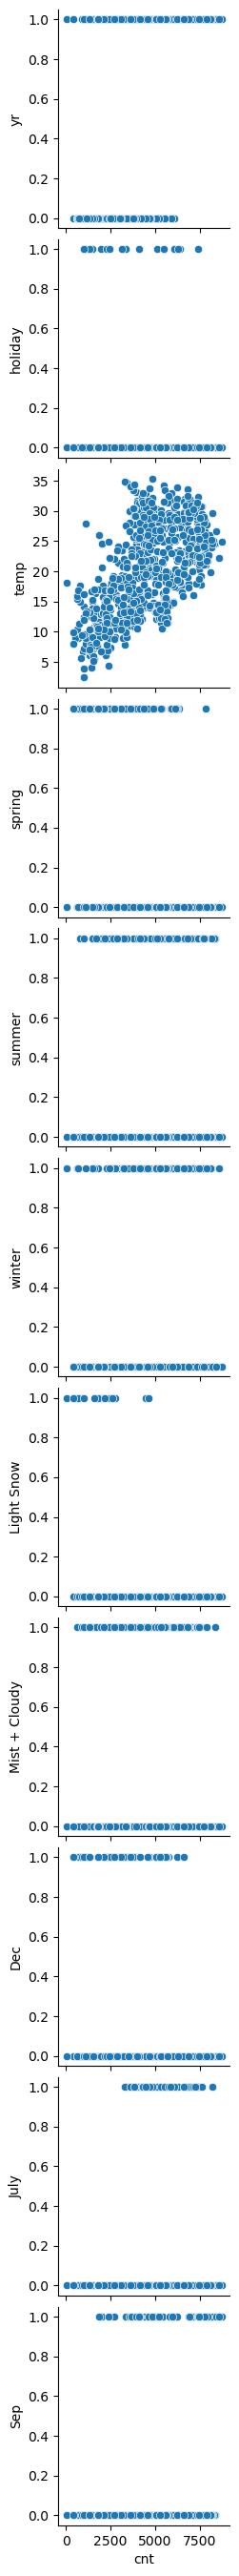

In [85]:
plt.figure(figsize = (5, 10))
sns.pairplot(df, y_vars=x_train_lr5.columns, x_vars='cnt')
plt.show()

# Conclusions made
- 1) As we have already noted, each variable in the model we have chosen has a VIF of 5, ensuring that there is no multicollinearity. 
- 2) As can be seen, temperature and the dependent variable have a linear connection. (cnt). 
- 3) Another assumption of linear regression is that the error distribution, as seen above, is normal (i.e., concentrated around 0).


# Lets move to Prediction and Evaluation of our model now 

In [91]:
r2_test = r2_score(y_true=ytest, y_pred=y_pred)
print('The R2 Result of our test model is:',r2_test*100)

The R2 Result of our model is: 81.13454912603692


In [92]:
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('The R2 Result of our train model is:', r2_train*100)

The R2 Result of our train model is: 82.4027346731514


# Lets see what we tested and trained in the form of  test vs train in graph form:

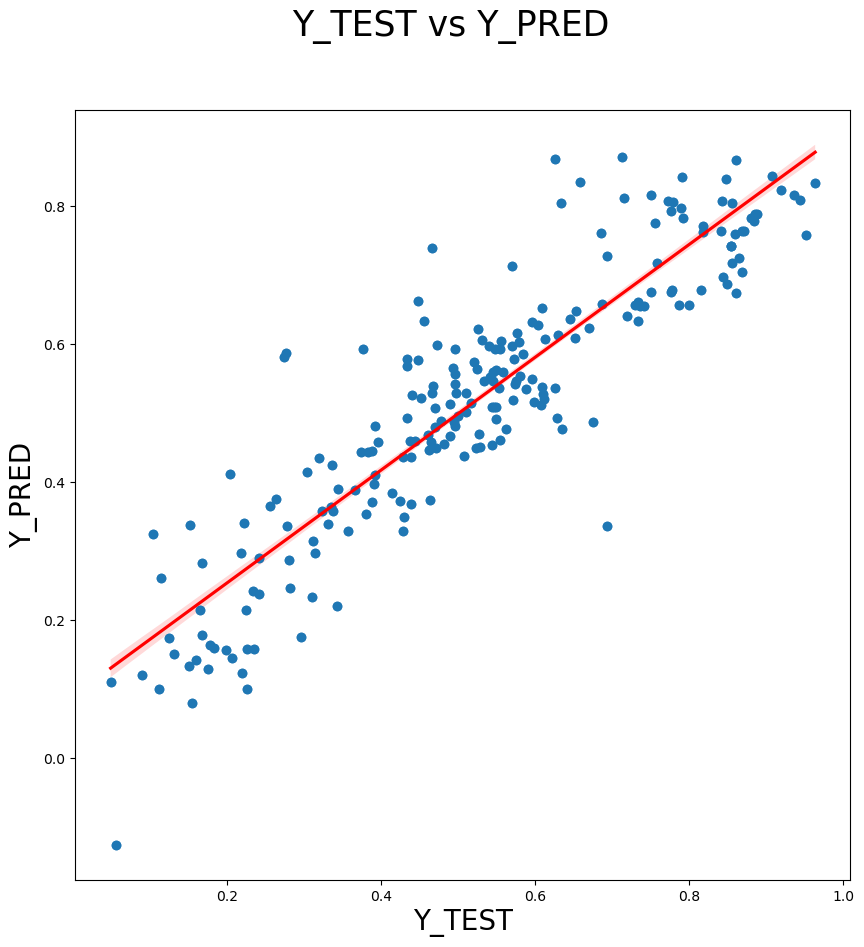

In [98]:
fig = plt.figure(figsize=(10, 10))
sns.regplot(x=ytest, y=y_pred,fit_reg=True,ci=60,line_kws={"color": "red"})
plt.scatter(ytest, y_pred)
fig.suptitle('Y_TEST vs Y_PRED', fontsize = 25)               
plt.xlabel('Y_TEST', fontsize = 20)                          
plt.ylabel('Y_PRED', fontsize = 20) 
plt.show()

# Conclusions made from the above Analysis, Predictions, Testing & Training

- We can gain valuable insights into both the bike rental business and human behaviour thanks to these interpretations. According to one of the recommendations based on this model, extensive marketing should be done in the spring and summer to increase rental rates. A solid marketing plan for the first six months of the year can help increase rental rates because the summertime also exhibits low rental levels. On days when the weather is less clear, there must be a strategy to introduce more users, possibly with rewards or clever bargains. Rentals increased in 2019 compared to 2018, which shows that more people will become aware of this concept over time. To keep repeat clients, a thorough study must be conducted.

- The mean squared error of our generated model is nearly zero on both the training and testing datasets, indicating that the variance is correctly predicted on the test set. The significant variables were chosen using the p-values and VIF. RFE was also carried out to pick variables automatically.

- We can infer that the temperature and whether it is a working day or not affect the bike needs for the BoomBikes company. In addition, it appears that demand for rentals is higher in the winter than it is in the summer and spring. We had seen that rental activity was increased in September and October. The focus was mostly on holidays rather than days like Wednesday, Thursday, and Saturday.

- The test set's R-squared value is 81.13%, whereas the train set's value is 82.40%, suggesting that our model accurately and broadly explains the variance on the test set. As a result, we can say that the model is effective.






